In [80]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

In [81]:
book_data = pd.read_csv("cleaned_data/cleaned_book_data.csv")
ratings_data = pd.read_csv("cleaned_data/cleaned_ratings.csv")

## Calculating Mean Scores

In [82]:
average_ratings = ratings_data.groupby("Title")["review/score"].mean()
books_merged = pd.merge(book_data, average_ratings, on='Title', how='inner')
books_merged.head(10)

,Title,description,authors,publisher,publishedDate,categories,ratingsCount,review/score
0,The Rabbi's Cat,Gaining the ability to speak after swallowing ...,['Joann Sfar'],Pantheon,2005,['Comics & Graphic Novels'],25.0,3.111111
1,From Potter's Field,"The sixth book in the Kay Scarpetta series, fr...",['Patricia Cornwell'],Hachette UK,2008-09-04,['Fiction'],19.0,3.200000
2,Economics in one lesson,"With over a million copies sold, Economics in ...",['Henry Hazlitt'],Currency,2010-08-11,['Business & Economics'],18.0,3.084337
3,Plain And Simple - A Woman's Journey To The Amish,"""I had an obsession with the Amish. Plan and s...",['Sue Bender'],Harper Collins,2009-03-17,['Religion'],11.0,2.857143
4,The Castle in the Attic,The classic children's story about a young boy...,['Elizabeth Winthrop'],Holiday House,2012-05-15,['Juvenile Fiction'],21.0,2.833333
5,Dumb witness,An elderly spinster has been poisoned in her c...,['AGATHA. CHRISTIE'],HarperCollins,2018-03-22,NaN,21.0,5.000000
6,Mothman Prophecies,This true account of the aliens who invaded th...,['John A. Keel'],Hachette UK,2013-03-28,"['Body, Mind & Spirit']",13.0,2.533333
7,The Gods of Mars,The Barsoom series continues: John Carter retu...,['Edgar Rice Burroughs'],Open Road Media,2020-03-17,['Fiction'],26.0,4.500000
8,The Forsythe Saga,The Forsyte Saga was the title originally dest...,['John Galsworthy'],FilRougeViceversa,2021-08-27,['Fiction'],20.0,4.083333
9,Learning To Bow - Inside The Heart Of Japan,The author describes his experiences teaching ...,['Bruce S. Feiler'],Mariner Books,1991,['Education'],11.0,2.400000


In [83]:
books_merged.to_csv("cleaned_data/books_withRatings.csv", index = False)

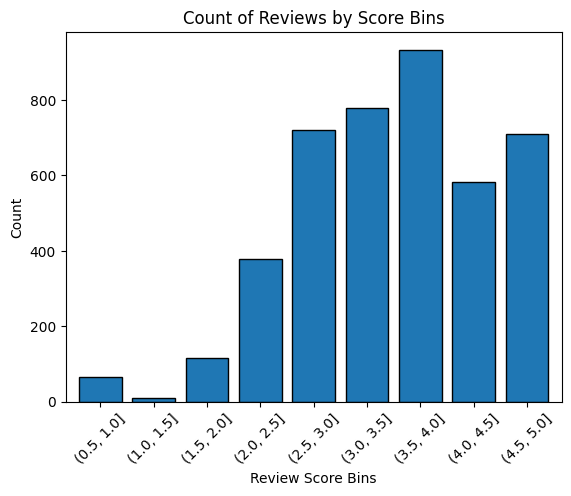

In [84]:
bins = [x / 2.0 for x in range(1, 11)]

books_merged['score_bin'] = pd.cut(books_merged['review/score'], bins)
bin_counts = books_merged['score_bin'].value_counts().sort_index()

# Plot the bar graph
bin_counts.plot(kind='bar', edgecolor='black', width=0.8)

# Customize the plot
plt.title('Count of Reviews by Score Bins')
plt.xlabel('Review Score Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

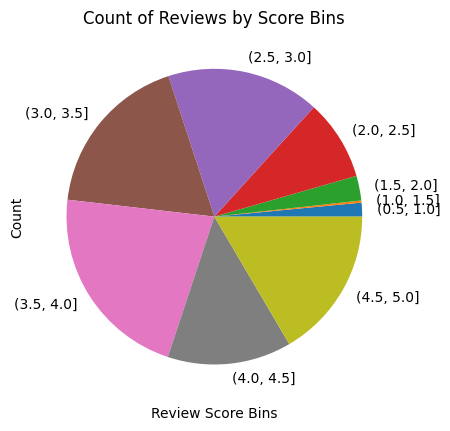

In [85]:

# Plot the bar graph
bin_counts.plot(kind='pie')

# Customize the plot
plt.title('Count of Reviews by Score Bins')
plt.xlabel('Review Score Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()

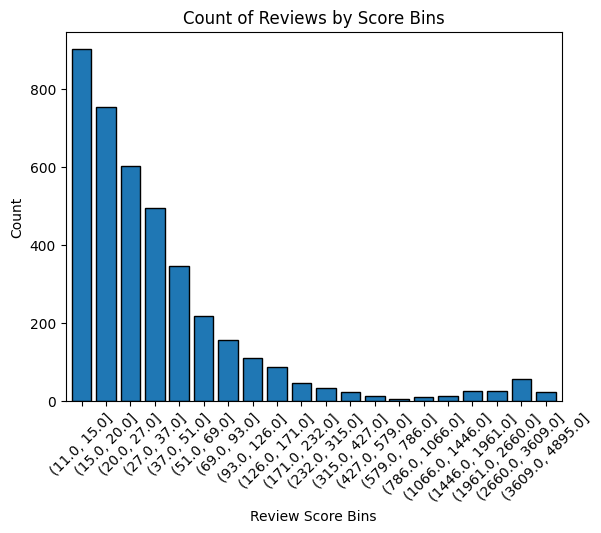

In [86]:
min_count = np.log10(books_merged['ratingsCount'].min())
max_count = np.log10(books_merged['ratingsCount'].max())

# Create 20 logarithmically spaced bins between min and max values
bins = np.round(np.logspace(min_count, max_count, 21))
books_merged['score_bin'] = pd.cut(books_merged['ratingsCount'], bins)
bin_counts = books_merged['score_bin'].value_counts().sort_index()

# Plot the bar graph
bin_counts.plot(kind='bar', edgecolor='black', width=0.8)

# Customize the plot
plt.title('Count of Reviews by Score Bins')
plt.xlabel('Review Score Bins')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

## Genres

In [87]:
books_merged["categories"].value_counts()

categories
['Fiction']                      2074
['Juvenile Fiction']              491
['Religion']                      257
['Biography & Autobiography']     208
['History']                       107
                                 ... 
['Apprentices']                     1
['Beagle Expedition']               1
['Chick lit']                       1
['English']                         1
['Horror tales, American']          1
Name: count, Length: 249, dtype: int64

In [88]:
categories_counts = books_merged["categories"].value_counts()
undefined = categories_counts[categories_counts < 19].index
books_merged.loc[books_merged["categories"].isin(undefined), "categories"] = "undefined"

In [89]:
genre_counts = books_merged['categories'].value_counts()

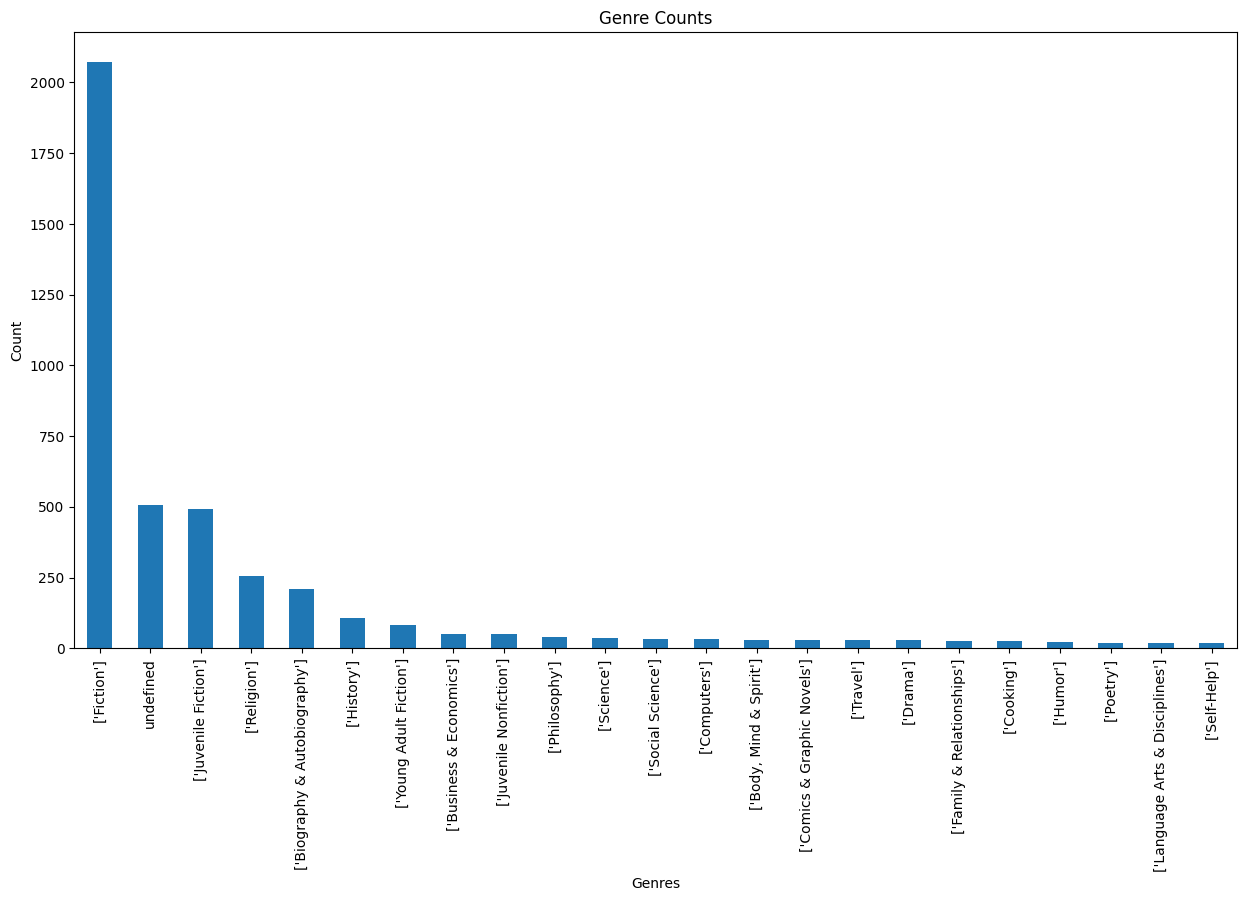

In [90]:
plt.figure(figsize=(15, 8))
genre_counts.plot(kind='bar')
plt.title('Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

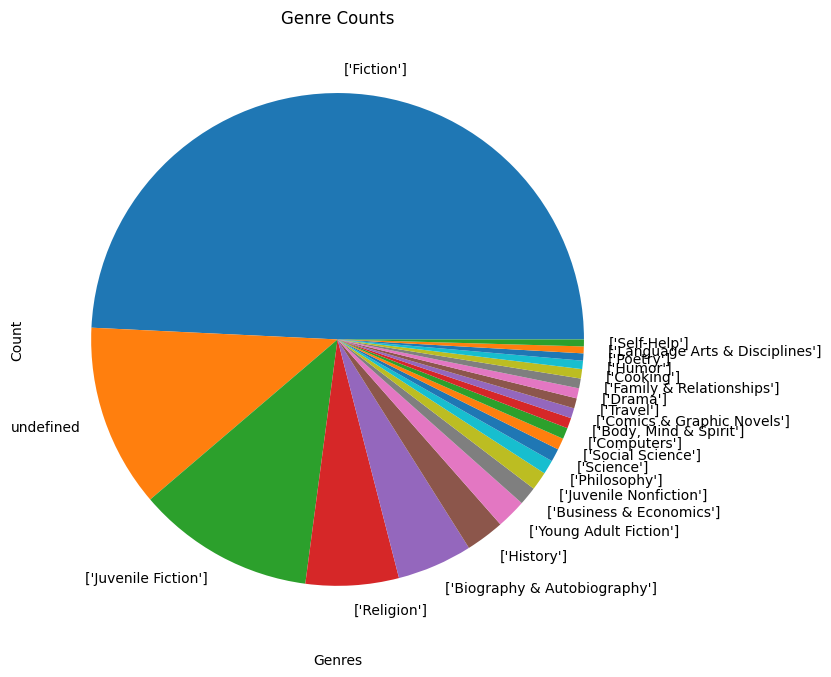

In [131]:
plt.figure(figsize=(15, 8))
genre_counts.plot(kind='pie')
plt.title('Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

## By publisher

In [91]:
books_merged["publisher"].value_counts()

publisher
Penguin                           376
Simon and Schuster                294
Harper Collins                    249
Vintage                           136
Random House                      116
                                 ... 
Legends of the Wolf                 1
Seal Books                          1
Holiday House                       1
Andrews McMeel Publishing, LLC      1
ECW Press                           1
Name: count, Length: 706, dtype: int64

In [92]:
categories_counts = books_merged["publisher"].value_counts()
undefined = categories_counts[categories_counts < 10].index
books_merged.loc[books_merged["publisher"].isin(undefined), "publisher"] = "independent"

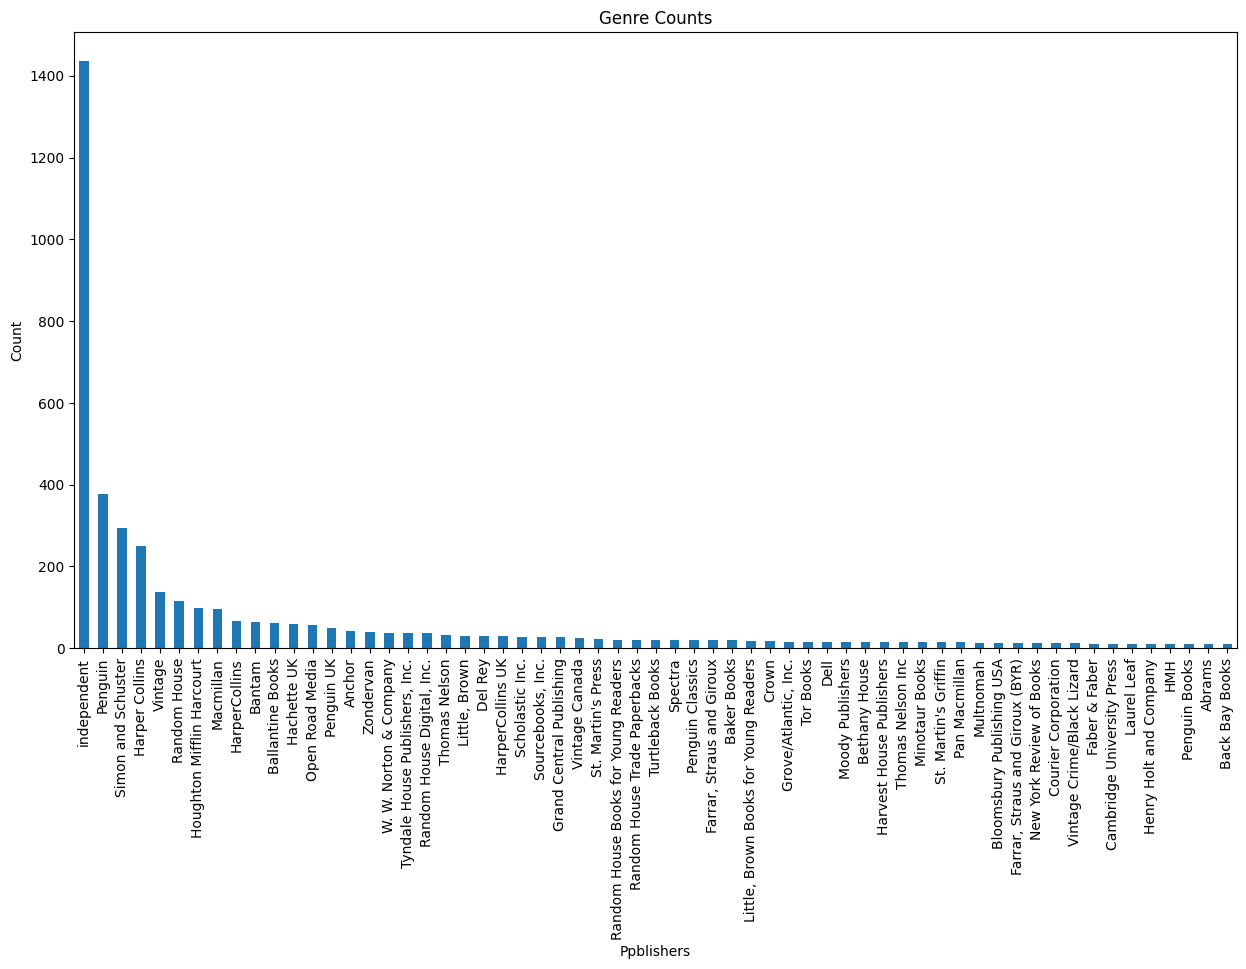

In [93]:
publisher_counts = books_merged['publisher'].value_counts()

plt.figure(figsize=(15, 8))
publisher_counts.plot(kind='bar')
plt.title('Genre Counts')
plt.xlabel('Ppblishers')
plt.ylabel('Count')
plt.show()

15 Largest Publishers

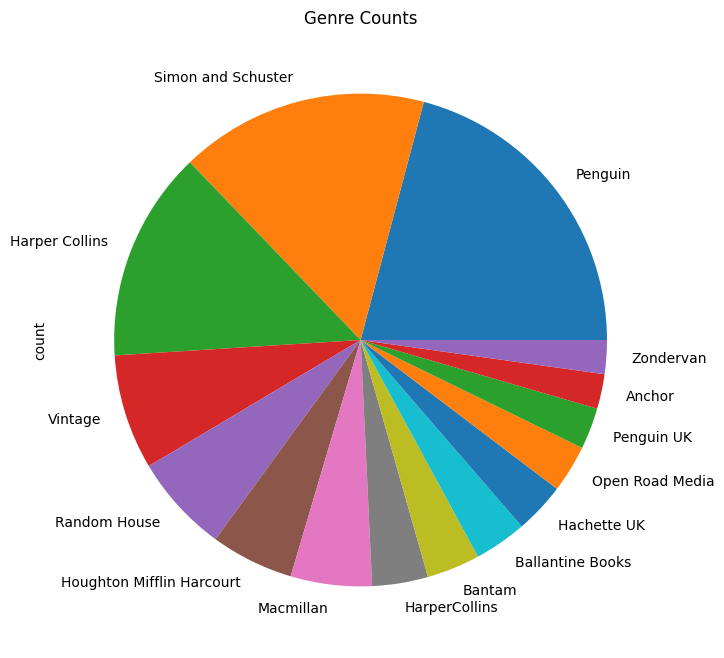

In [136]:
publisher_counts_noindependent = publisher_counts[1:16]

plt.figure(figsize=(15, 8))
publisher_counts_noindependent.plot(kind='pie')
plt.title('Genre Counts')
plt.show()

## Plot 

[]

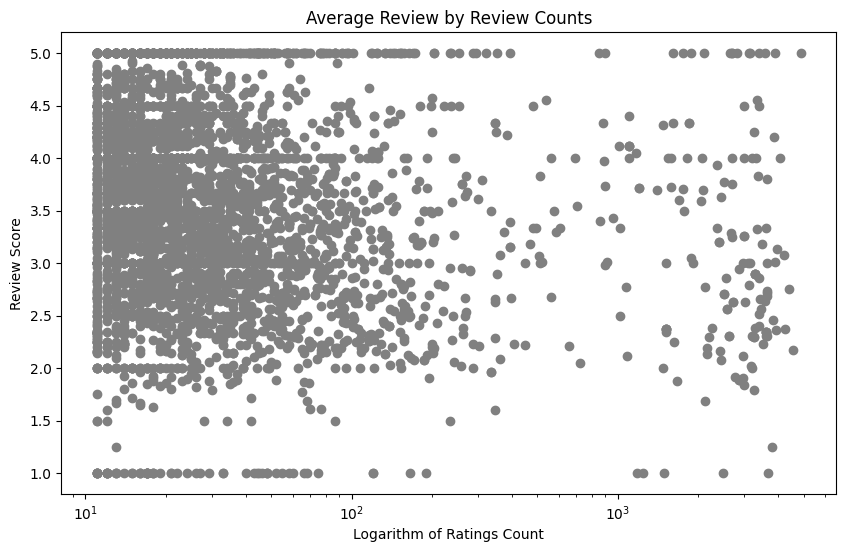

In [129]:
plt.figure(figsize=(10, 6)) 
plt.scatter(x= books_merged["ratingsCount"], y = books_merged["review/score"], color = "grey")
plt.xscale('log')
plt.xlabel('Logarithm of Ratings Count')
plt.ylabel('Review Score')
plt.title("Average Review by Review Counts")
plt.plot()

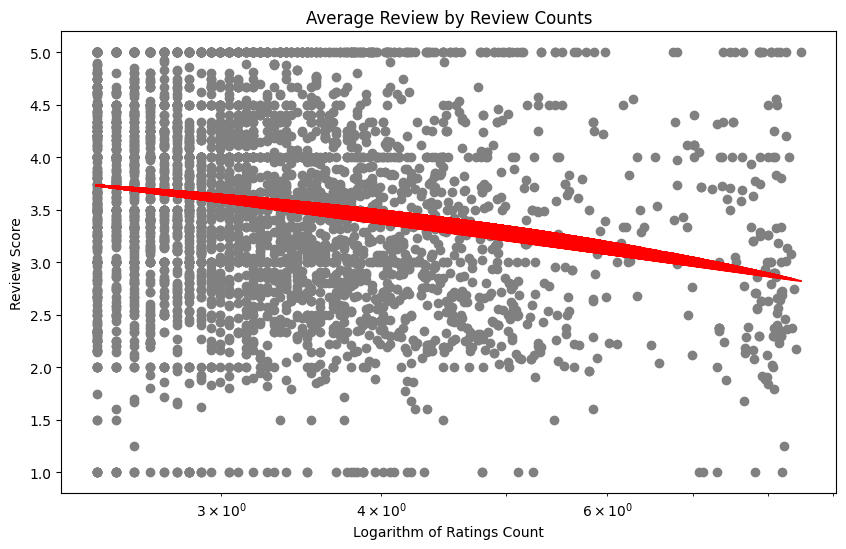

In [130]:
# Assuming books_merged is your DataFrame
x = np.log(books_merged["ratingsCount"])  # Log-transform the x-axis
y = books_merged["review/score"]

# Reshape x to a 2D array (required by scikit-learn)
x_reshaped = x.values.reshape(-1, 1)

# Fit linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Predict y values using the model
y_pred = model.predict(x_reshaped)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = "grey")
plt.xscale('log')
plt.xlabel('Logarithm of Ratings Count')
plt.ylabel('Review Score')
plt.title('Average Review by Review Counts')

plt.plot(x, y_pred, color='red')

plt.show()


In [110]:
x = np.log(books_merged["ratingsCount"])
y = books_merged["review/score"]
x_reshaped = x.values.reshape(-1, 1)
X = sm.add_constant(x_reshaped)

quantiles = [0.25, 0.5, 0.75]
results_df = pd.DataFrame(index=quantiles, columns=['Intercept', 'Slope'])

for q in quantiles:
    model = sm.QuantReg(y, X)
    result = model.fit(q=q)
    results_df.loc[q, 'Intercept'] = result.params['const']
    results_df.loc[q, 'Slope'] = result.params['x1']

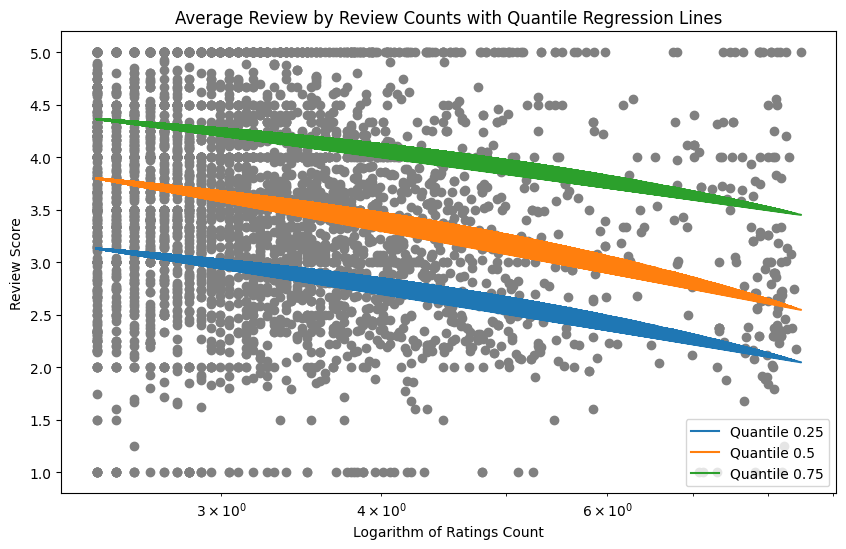

In [124]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color = "grey")
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.xlabel('Logarithm of Ratings Count')
plt.ylabel('Review Score')
plt.title('Average Review by Review Counts with Quantile Regression Lines')

# Plot quantile regression lines
for q in quantiles:
    plt.plot(x, results_df.loc[q, 'Intercept'] + results_df.loc[q, 'Slope'] * x, label=f'Quantile {q}')

plt.legend()
plt.show()